<a href="https://colab.research.google.com/github/Aadarsha2002/FutureMakers2022/blob/main/Day_4_Intro_to_TensorFlow_AGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

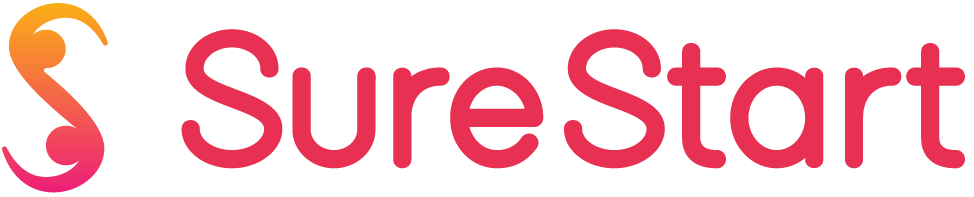

#Day 4 Objectives:
* To continue your introduction to some basic Machine Learning (ML) concepts and models. 
* To build your ML model development skills.


#Introduction to TensorFlow

TensorFlow is a open source python library made towards building, training and deploying deep neural networks. TensorFlow has a toolkit for visualizing its neural networks called TensorBoard.

TensorFlow 1.0.0 is Google's end-to-end open source platform for machine learning. There are versions of TensorFlow in JavaScript as well called Tensorflow.js. It is availabe on Linux, MacOS and Windows. Google released TensorFlow Lite specifically for mobile application development.

We will use TensorFlow 2.6, which incorporates various third party libraries within TensorFlow itself. The Keras wrapper for TensorFlow is now a TensorFlow module. There are cross compatibilities to code written in TensorFlow 1.0.

What follows can be considered to be a gentle introduction to TensorFlow for the purposes of this program.

Following this primer, for further learning, check out the following offering by Google: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit

As usual, let's begin by importing the libraries that we will use today:

In [20]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import matplotlib.pyplot as plt
import numpy as np

TensorFlow version: 2.8.2


#What are tensors?

Tensors are multi-dimensional arrays with a uniform type (called a `dtype`). You can see all supported dtypes at `tf.dtypes.DType`.

 Tensors are like `numpy.ndarray`, which has a data type and a shape.
 
Native Python types are automatically converted to tensors by Tensorflow.

In the codeblock below, we demonstrate various Tensorflow functions. Besides those, Tensorflow functions also include: 
* `subtract(x, y, name=None)`	Subtracts two tensors
* `divide(x, y, name=None)`	Divides the elements of two tensors
* `add_n(inputs, name=None)`	Adds multiple tensors
* `mod(x, y, name=None)`	Performs the modulo operation
* `abs(x, name=None)`	Computes the absolute value
* `negative(x, name=None)`	Negates the tensor’s elements
* `sign(x, name=None)`	Extracts the signs of the tensor’s element

There are many other mathematical functions you can check out at: https://www.tensorflow.org/api_docs/python/tf/math




In [21]:
# You can create a tensor as follows
print("Tensor:", tf.constant([4, 5, 6]))

# When two whole numbers are given to a Tensorflow function, it produces a tensor with the solution 
print("Scalar Addition:", tf.add(1, 2))

# A list given to the same function creates a tensor, treating the two lists as matrices
print("Matrix Addition:", tf.add([1, 2], [3, 4]))

# All basic mathematical functions still work as would be expected, just with tensor outputs
print("Squaring:", tf.square(5))

# The tf.reduce_sum() function reduces the dimensionality of a list given to it and sums all the elements
print("Dimension-wise Addition:", tf.reduce_sum([1, 2, 3]))

# We can treat tensors as other forms of arrays or numbers within python functions
print("+ Operator Overriding:", tf.square(2) + tf.square(3))

Tensor: tf.Tensor([4 5 6], shape=(3,), dtype=int32)
Scalar Addition: tf.Tensor(3, shape=(), dtype=int32)
Matrix Addition: tf.Tensor([4 6], shape=(2,), dtype=int32)
Squaring: tf.Tensor(25, shape=(), dtype=int32)
Dimension-wise Addition: tf.Tensor(6, shape=(), dtype=int32)
+ Operator Overriding: tf.Tensor(13, shape=(), dtype=int32)


## Question 1

Use the functions you just learned to compute the sum of elements across each of the two columns.

The output should be a tensor with two elements in it. 

Hint: look up the `tf.reduce_sum` function in https://www.tensorflow.org/api_docs/python/tf/math

### Answer 1

In [22]:
tensor = tf.constant([[1, 2],
                     [3, 4],
                     [5, 6]])

# Write a short comment (indicated by #) to describe what tf.reduce_sum does 
    # tf.reduce_sum computes the sum of elements across dimensions of a tensor.

#Enter your code here to sum the elements across the two columns
print(tf.reduce_sum(tensor, 0))

tf.Tensor([ 9 12], shape=(2,), dtype=int32)


A few more useful Tensorflow functions:

In [23]:
# You can multiply matrices, here we are multiplying a 1 x 1 matrix with a 1 x 2 matrix
x = tf.matmul([[1]], [[2, 3]])

# Tensors are immutable, we will talk about it in the next cell
print("Tensor:", x)

# The shape of a tensor is represented by a native python datastructure
print("Shape:", x.shape)

# The type of a tensor is represented by a native python datatype
print("Datatype:", x.dtype)

Tensor: tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
Shape: (1, 2)
Datatype: <dtype: 'int32'>


#Fun Fact

Eugene Goostman is the first chatbot that some regard as having passed the Turing test. It was developed by three friends, programmers Vladimir Veselov, Eugene Demchenko and Sergey Ulasen. Eugene Goostman was portrayed as a 13-year-old boy from Odessa, Ukraine, who has a pet guinea pig, and a father who is a gynecologist. On 7 June 2014, in a Turing test competition at the Royal Society, Goostman won after 33% of the judges were convinced that the bot was human.



A conversation between Scott Aaronson and Eugene Goostman went as follows:

Scott: Which is bigger: a shoebox or Mount Everest?

Eugene: I can’t make a choice right now. I should think it out later. And I forgot to ask you where you are from…

Scott: How many legs does a camel have?

Eugene: Something between 2 and 4. Maybe, three? :-))) By the way, I still don’t know your specialty – or, possibly, I’ve missed it?

Scott: How many legs does a millipede have?

Eugene: Just two, but Chernobyl mutants may have up two five. I know you are supposed to trick me.

Scott: No, I need to know that you're not a chatbot. Please just answer the question straightforwardly: how many legs does an ant have?

Eugene: Something between 2 and 4. Maybe three? :-))) Oh, what a fruitful conversation ;-)

#Ranks and Tensors
All tensors are **immutable** like Python numbers and strings; i.e., you can never update the contents of a tensor, only create a new one. 

Tensors have different **ranks** to them, which correspond to how many axes/dimensions a tensor has to itself. A rank-0 tensor is just a scalar. A rank-1 tensor would be a list of values and a rank-2 tensor would be a list of lists.

You can convert a tensor to a NumPy array either using `np.array` or the `tensor.numpy` method. The base `tf.Tensor` class requires tensors to be "rectangular"; that is, along each axis, every element is the same size.







In [24]:
# This is how one can create a rank-0 Tensor
# This will be an int32 tensor by default
rank_0_tensor = tf.constant(4)
print("Rank 0 Tensor:\n", rank_0_tensor, "\n")

# This is how one can make a rank-1 Tensor
# Let's make this a float tensor.
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print("Rank 1 Tensor:\n", rank_1_tensor, "\n")

# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print("Rank 2 Tensor:\n", rank_2_tensor, "\n")

# Conversion between numpy arrays and tensorflow tensors is very simplistic
print("Tensor to Numpy Array with np.array():\n", np.array(rank_2_tensor), type(np.array(rank_2_tensor)), "\n")
print("Tensor to Numpy array with tf.numpy():\n", rank_2_tensor.numpy(), type(np.array(rank_2_tensor)))

Rank 0 Tensor:
 tf.Tensor(4, shape=(), dtype=int32) 

Rank 1 Tensor:
 tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32) 

Rank 2 Tensor:
 tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16) 

Tensor to Numpy Array with np.array():
 [[1. 2.]
 [3. 4.]
 [5. 6.]] <class 'numpy.ndarray'> 

Tensor to Numpy array with tf.numpy():
 [[1. 2.]
 [3. 4.]
 [5. 6.]] <class 'numpy.ndarray'>


In [25]:
# You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) 
# Could have also used `tf.ones([2,2])`

print("Element wise Addition:\n" , tf.add(a, b), "\n")
print("Element wise Multiply:\n" , tf.multiply(a, b), "\n")
print("Matrix Multiplication:\n" , tf.matmul(a, b), "\n")

Element wise Addition:
 tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

Element wise Multiply:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

Matrix Multiplication:
 tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [26]:
# Tensors can be referred as regular native Python variables

# element-wise addition
print("Element wise Addition:" ,  a + b, "\n") 

# element-wise multiplication
print("Element wise Multiply:" , a * b, "\n") 

# matrix multiplication
print("Matrix Multiplication:" , a @ b, "\n") 

Element wise Addition: tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

Element wise Multiply: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

Matrix Multiplication: tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



## Question 2
Tensors are immutable objects; i.e., the contents of a tensor cannot be changed while it is a tensor.  

Look at the tensor with the variable name "tensor" below. How can we change its first element to 9 from its current value of 3 and print it out? 

Remember: You have to print the first element of the same tensor --- you cannot create a new tensor. 

Hint: You can convert a tensor to a NumPy array either using `np.array` or the `tensor.numpy` method. And you can convert a NumPy array to a tensor using `tf.convert_to_tensor`. 

### Answer 2

In [27]:
tensor = tf.constant([3, 2, 1])

# Enter your code to update the first element to 9
tensor=np.array(tensor)
tensor[0]=9
tf.convert_to_tensor(tensor)

#print the updated value of tensor
print(tensor[0])

9


**Constant** versus **Variable:**

Consider the two tensors below. One created with `tf.Variable` and one created with `tf.constant`. 

We show you how to assign a new value to to the `tf.Variable`. Try doing the same with tensor created with `tf.constant`. What happens?

**An error is output stating tf.constant doesn't have an attribute named 'assign'.**

In [28]:
# variable_tensor=tf.Variable([3, 2, 1])
# constant_tensor=tf.constant([3, 2, 1])

# variable_tensor.assign([1, 2, 3])
# print(variable_tensor)

# constant_tensor.assign([1, 2, 3])
# print(constant_tensor)

## Question 3

What is your intuition behind the difference between `tf.constant` and `tf.Variable`?

**The absence of 'assign' in tf.constant makes sense because you don't want to change/assign something new to a constant object. The opposite is true for the tf.variable object.**

#Loading Datasets and Preprocessing the Data
The MNIST dataset — often used as the "Hello, World" of machine learning programs for computer vision — contains images of handwritten digits (0, 1, 2, etc.). A drop-in replacement for this classic MNIST dataset is Fashion MNIST, which is a dataset of images of articles of clothing. 

We use Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Tensorflow has these datasets inbuilt in it. You would call the classic numbers MNIST dataset as `tf.keras.datasets.mnist` and the fashion MNIST dataset as `tf.keras.datasets.fashion_mnist`.

In [29]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [31]:
# Separating data into train and test samples is one of the first steps of model development

# We see the shape of this dataset, 60,000 images of 28x28 pixels
print("Shape of train samples:", train_images.shape)

# Each sample is within the range of 0 to 9
print("Range of train and test samples:", train_labels)

# There are 10,000 images, again of 28x28 pixels
print("Shape of test samples:" , test_images.shape)

# A common split of train to test samples is 80/20 but here the train:test ratio is 6:1  

Shape of train samples: (60000, 28, 28)
Range of train and test samples: [9 0 0 ... 3 0 5]
Shape of test samples: (10000, 28, 28)


The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

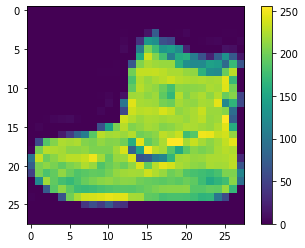

In [32]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

In [33]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Question 4

Internet research time! Do some web search and answer these two questions: 

1) Why do we scale these values to a range between 0 and 1? 

2) What would happen if we just directly fed these values to the neural network as we did in Day 3?

1. **To minimize the errors that are a result of a highly variable data, it is better to scale the values to be between 0 and 1, such that the colors become greyscale.**
2. **The data would have a high amount of variance because of the different colors, and hence accuracy would suffer.**

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

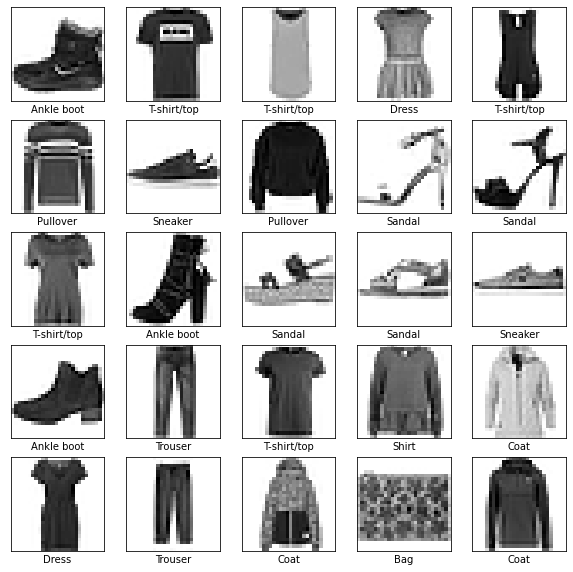

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Fun fact 

Did you know about the Japanese confectionery shop that employed a machine learning scientist to automate sorting and billing of their 100s of types of pastries?  And later that same model was used to succesfully find cancer symptoms in patients tissue, as apparently that tissue under an MRI looks like pastries. Read about it in this [New Yorker article](https://www.newyorker.com/tech/annals-of-technology/the-pastry-ai-that-learned-to-fight-cancer).


#Build a simple (fairly shallow) neural network learning model

During the Day 3 notebook questions, we did not use the `tf.keras.layers.Flatten` function. We had first a `tf.keras.Input`, which takes a numerical input. 


The first layer in the network below is `tf.keras.layers.Flatten`. It transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up into a single row. This layer has no parameters to learn; it only reformats the data.

The second layer of this model is a `tf.keras.layers.Dense` layer, which is a fully connected feed forward layer, that is often used for changing the dimensions of the feature vectors or to apply various operations to the latter.

The third layer is also a `tf.keras.layers.Dense` layer with 10 nodes,  corresponding to one of each classes. 

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

We have talked about optimizers and loss functions in Day 3. 

There is a concept of momentum in machine learning along with gradient descent that accumulates the gradient of the past steps to determine where to go in the potential space of the loss function, instead of only using current gradient to select where to go in that space.

With `RMSprop` (Root mean squared propogation) optimizer, that momentum reaches much higher values before it changes any direction. `RMSprop` is more often used with recurrent neural networks.

While `Adam` (derived from "adaptive moment estimation") is slower to change its direction, and then much slower to get back to the minimum. `Adam` can handle sparse datasets for noisy problems, which often suits image estimation problems well. 



In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train and Evaluate Model

Irrespective of the input type, the process and functions for training a TensorFlow model is fairly similar for most types of classification models.

In [37]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5024 - accuracy: 0.8241
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3733 - accuracy: 0.8641
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3378 - accuracy: 0.8764
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3142 - accuracy: 0.8839
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8925
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2820 - accuracy: 0.8952
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.8987
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9049
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9065
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

#Model evaluation
Once the model has been trained, we evaluate how well the model performs on the test set (sometimes called the held-out set). See the Tensorflow function call for performing this evaluation.

In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4000 - accuracy: 0.8869 - 568ms/epoch - 2ms/step

Test accuracy: 0.886900007724762


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents **overfitting**. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

## Question 5

Why do you think this image classification task was able to successfully classify into its 10 classes with just 1 trainable layer while in the models in *Day 3*, it may take upto ~5 layers for getting accuracy in a binary classification task for "Dataset 1" in "Question 7"?

Hint: Consider, research, and discuss in your teams: whether the neural network model you designed above is a linear model or not; what kind of data does a linear model; and is the XOR dataset from Day 3 linear or not.

### Answer 5

The XOR problem is specifically difficult for a linear classifier to solve, and possible with a neural network with more than one hidden layer. 

The problem in question is a more complex form of the XOR problem in a 4X4 grid. Which requires more complex connections to learn the patterns in it. 

While we have a 28X28 image for this classification task which is much simpler in terms of the patterns it exhibits.

#Making predictions using the trained model

`tf.keras.layers.Dense` outputs values of a neuron getting fired up, and all those neurons map a certain input to a certain class. These values are called **logits**. Logits on their own are not bounded (as in don't have a range) and are less interpreteable (as to what the output value indicates).

We normalize the output of the last `tf.keras.layers.Dense` layer to the bounds of $[0, 1]$ using the `softmax` function. Softmax converts logits into **probabilities** for each class, such that when we add all the outputs the result is always 1. We will learn more about Softmax on Day 10.

In [39]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [40]:
#tf.predict predicts the label of each of the images in the test set.
predictions = probability_model.predict(test_images)
#For each image, the output is an array of 10 numbers. 
# They represent the model's "confidence"
# that the image corresponds to each of the 10 different articles of clothing. 
# Let's look at the predictions of the zero-th image
print(predictions[0],"\n")

[3.38806372e-10 6.66611785e-13 7.16817855e-11 7.41051942e-11
 2.18711957e-13 1.40532438e-06 1.05696444e-13 4.50573349e-03
 1.47072465e-14 9.95492816e-01] 



In [41]:
# Let's look at which is the most likely label (aka, the prediction):
# That is estimated by finding the position of the maximum confidence score 
# In the statement below, let's specifically look at what is predictedd for the zero-th image
print(np.argmax(predictions[0]),"\n")
#Now let's look at which is the true label of the zero-th image
print(test_labels[0],"\n")
#if they match, the prediction was correct!

9 

9 



# Verifying predictions

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

In [42]:
# Code to visualize results
# go through each line of code and try to understand what it is doing

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

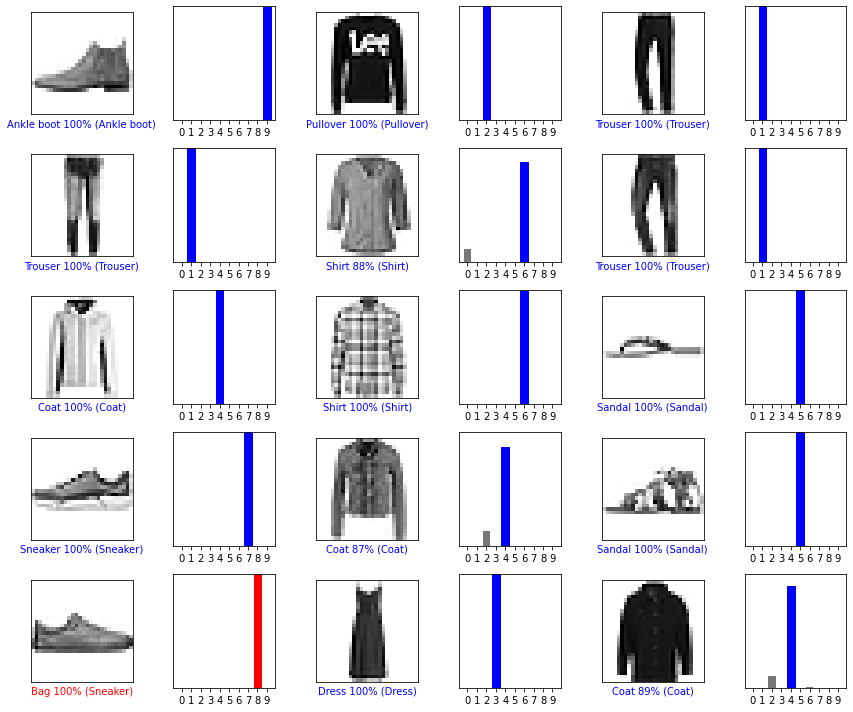

In [43]:
# Plot the first X (in our case, we did 5 X 3) test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)

  #review the plot_image function above
  plot_image(i, predictions[i], test_labels, test_images)

  plt.subplot(num_rows, 2*num_cols, 2*i+2)

  #review the plot_value_array function above
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Use the Trained model

This next codeblock contains code for making individual predictions.

(28, 28)
(1, 28, 28)
[[2.1092594e-05 3.8872198e-17 9.9995673e-01 2.7681958e-13 2.0486035e-05
  1.0792089e-14 1.6172337e-06 1.2843219e-16 3.6343236e-15 5.6814818e-22]]


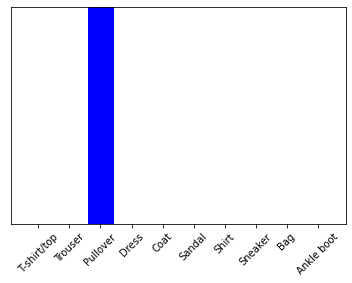

2

In [44]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
# tf.keras models are optimized to make predictions on a batch, 
# or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list
img = (np.expand_dims(img,0))

print(img.shape)

# Now predict the correct label for this image
predictions_single = probability_model.predict(img)

print(predictions_single)

#refer to the the plot_value_array function above
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

# tf.keras.Model.predict returns a list of lists — one list for each image in the batch of data. 
# Grab the predictions for our (only) image in the batch
np.argmax(predictions_single[0])

# And the model predicts a label as expected.


# **Upload this Day 4 Colab Notebook to your Github repository under "Day 4" folder. Also add your *Reflection* on today's learning in README.md**

Source: https://www.tensorflow.org/tutorials

https://en.wikipedia.org/wiki/TensorFlow